C:\Users\surek\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.0074 - loss: 4.6829
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.0356 - loss: 4.6704
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.0369 - loss: 4.6486
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.0555 - loss: 4.6079
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.0689 - loss: 4.5381
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.0690 - loss: 4.4834
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.0329 - loss: 4.4657
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.0555 - loss: 4.4130
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.0946 - loss: 4.3386
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.0724 - loss: 4.2322
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.0976 - loss: 4.2082
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy:

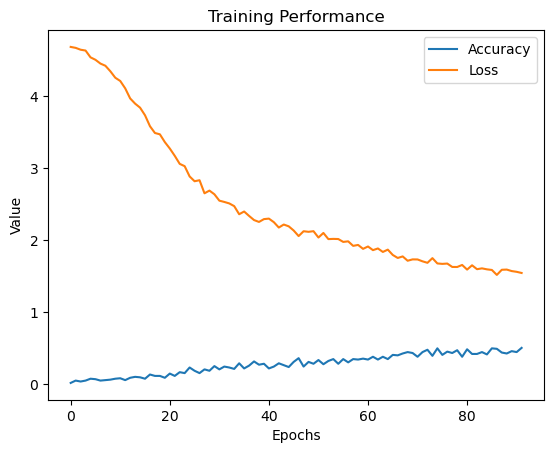


Generated Text:

generative ai refers category a a artificial intelligence of intelligence that that that generate data data the on on trained on on they algorithms create create create text text other other and and other type of generative generative generative which ai network is adversarial gan two networks gan neural neural with other


In [3]:
# 📌 Step 1: Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# 📌 Step 2: Sample text data
text = """
Generative AI refers to a category of artificial intelligence algorithms that generate new data based on the data they were trained on.
These algorithms can create text, images, music, and other media. One popular type of generative AI is the Generative Adversarial Network (GAN),
which consists of two neural networks contesting with each other to generate new, synthetic instances of data that can pass for real data.
Another example is the Transformer architecture, which is widely used in natural language processing tasks.
Transformers have revolutionized the field of AI by enabling the creation of highly coherent and contextually relevant text.
With the advancement of deep learning techniques, generative AI has become a powerful tool for innovation across various industries,
including entertainment, healthcare, and finance. It is used for creating art, designing drugs, writing news articles, and much more.
The potential applications of generative AI are vast and continually expanding as researchers develop more sophisticated algorithms.
"""

# 📌 Step 3: Preprocessing
text = text.lower().replace('\n', ' ')

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Generate input sequences using n-grams
input_sequences = []
token_list = tokenizer.texts_to_sequences([text])[0]
for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

# Pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')

# Create predictors and label
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
label = to_categorical(label, num_classes=total_words)

# 📌 Step 4: Model building
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 📌 Step 5: Train the model with EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
history = model.fit(predictors, label, epochs=100, verbose=1, callbacks=[early_stopping])

# 📌 Step 6: Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training Performance')
plt.legend()
plt.show()

# 📌 Step 7: Generate text with temperature sampling
def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-7) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return np.random.choice(len(preds), p=preds)

def generate_text(seed_text, next_words, model, max_sequence_len, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)[0]
        predicted_word_index = sample_with_temperature(predicted, temperature)
        output_word = tokenizer.index_word.get(predicted_word_index, '')
        if output_word == '':
            break
        seed_text += " " + output_word
    return seed_text

# 📌 Step 8: Try generating text
print("\nGenerated Text:\n")
print(generate_text("generative ai", 50, model, max_sequence_len, temperature=0.8))
